In [1]:
import numpy as np
from stingray import Lightcurve, Powerspectrum, AveragedPowerspectrum
import matplotlib.pyplot as plt

In [6]:
N = 500  # Number of points
T = 1.0 / 100.0  # Sampling interval (1/sampling rate)
t = np.linspace(0.0, N*T, N, endpoint=False)
f1, f2 = 5, 20  # Frequencies in Hz
signal = np.sin(2.0*np.pi*f1*t) + 0.5*np.sin(2.0*np.pi*f2*t) + 0.1*np.random.randn(N)

In [1]:
lc=Lightcurve(t,signal)
plt.figure()
plt.title('Signal')
plt.plot(lc.time,lc.counts)

NameError: name 'Lightcurve' is not defined

In [8]:
ps_frac=Powerspectrum.from_lightcurve(lc,norm='frac')
ps_abs=Powerspectrum.from_lightcurve(lc,norm='abs')

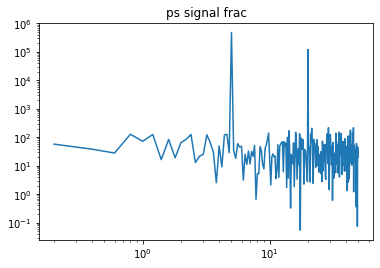

In [10]:
plt.figure()
plt.title('ps signal frac')
plt.plot(ps_frac.freq,ps_frac.power)
plt.xscale('log')
plt.yscale('log')


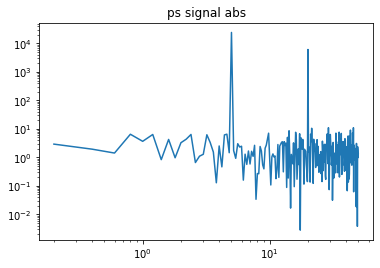

In [11]:
plt.figure()
plt.title('ps signal abs')
plt.plot(ps_abs.freq,ps_abs.power)
plt.xscale('log')
plt.yscale('log')


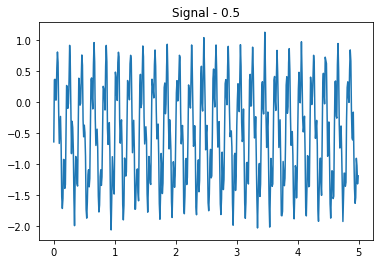

In [14]:
signal_sub=signal-0.5
plt.figure()
plt.title('Signal - 0.5')
plt.plot(t,signal_sub)

In [ ]:
lc_sub=Lightcurve(t,signal_sub)
ps_sub_frac=Powerspectrum.from_lightcurve(lc_sub,norm='frac')
ps_sub_abs=Powerspectrum.from_lightcurve(lc_sub,norm='abs')
ps_sub_none=Powerspectrum.from_lightcurve(lc_sub,norm='none')

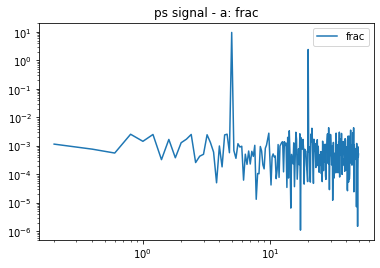

In [16]:
plt.figure()
plt.title('ps signal - 0.5: frac')
#plt.plot(ps.freq,ps.power,label='original')
plt.plot(ps_sub_frac.freq,ps_sub_frac.power,label='frac')
plt.xscale('log')
plt.yscale('log')
#plt.plot(ps_sub_none.freq,ps_sub_none.power,label='none')
plt.legend()
plt.show()

In [88]:
print(ps_sub_frac.power==ps_frac.power)

print(ps_sub_abs.power==ps_abs.power)

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False Fa

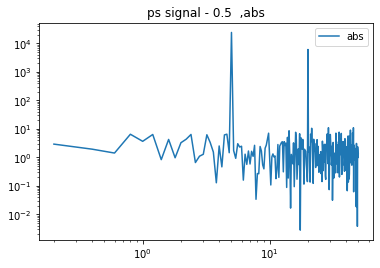

In [17]:
plt.figure()
plt.title('ps signal - 0.5  ,abs')

plt.plot(ps_sub_abs.freq,ps_sub_abs.power,label='abs')
plt.xscale( 'log')
plt.yscale('log')
plt.legend()
plt.show()

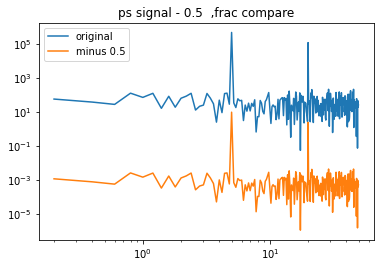

In [18]:
#Frac compare 
plt.figure()
plt.title('ps signal - 0.5  ,frac compare')
plt.plot(ps_frac.freq,ps_frac.power,label='original')
plt.plot(ps_sub_frac.freq,ps_sub_frac.power,label='minus 0.5')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()

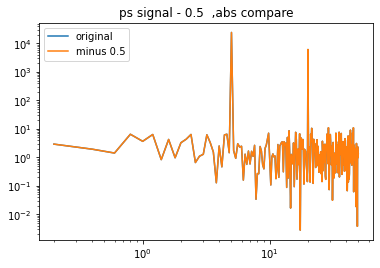

In [19]:
#abs compare
plt.figure()
plt.title('ps signal - 0.5  ,abs compare')
plt.plot(ps_abs.freq,ps_abs.power,label='original')
plt.plot(ps_sub_abs.freq,ps_sub_abs.power,label='minus 0.5')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()


In [22]:
print(ps_sub_abs.power[:10])
print(ps_abs.power[:10])

[2.92040734 1.9414116  1.41952627 6.48607301 3.66336933 6.36262981
 0.83346362 4.26195161 0.96983424 3.27105794]
[2.92040734 1.9414116  1.41952627 6.48607301 3.66336933 6.36262981
 0.83346362 4.26195161 0.96983424 3.27105794]


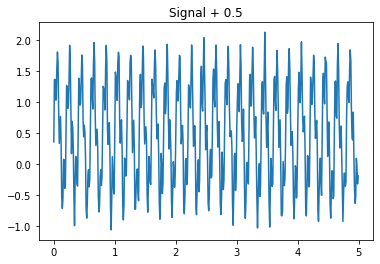

In [32]:
#NOW FOR ADD

signal_add=signal+0.5
plt.figure()
plt.title('Signal + 0.5')
plt.plot(t,signal_add)

In [33]:
lc_add=Lightcurve(t,signal_add)
ps_add_frac=Powerspectrum.from_lightcurve(lc_add,norm='frac')
ps_add_abs=Powerspectrum.from_lightcurve(lc_add,norm='abs')
ps_add_none=Powerspectrum.from_lightcurve(lc_add,norm='none')


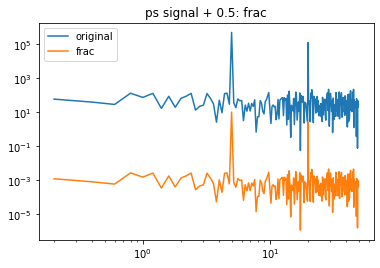

In [34]:
plt.figure()
plt.title('ps signal + 0.5: frac')
plt.plot(ps_frac.freq,ps_frac.power,label='original')
plt.plot(ps_add_frac.freq,ps_add_frac.power,label='frac')
plt.xscale('log')
plt.yscale('log')
plt.legend()


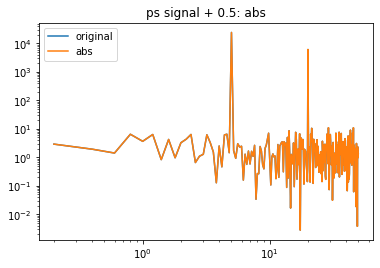

In [35]:
plt.figure()
plt.title('ps signal + 0.5: abs')
plt.plot(ps_abs.freq,ps_abs.power,label='original')
plt.plot(ps_add_abs.freq,ps_add_abs.power,label='abs')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()


In [3]:
import numpy as np
file1= '/home/c2032014/Her_X1/Obs0203/event_1pt5_final/ixpe02004001_det12_evt1pt5_v01_timecorr.fits'
file2= '/home/c2032014/Her_X1/Obs0203/event_1pt5_final/ixpe02004001_det3_evt1pt5_v01_timecorr.fits'
Pmin=51
Pmax=200
gti='/home/c2032014/Her_X1/Obs0203/event_1pt5_final/GTI_ixpe02004001_evt1pt5_v01_timecorr.txt'
bin_length=1/64
seg_length=16
fmin=0.7
fmax=0.9
mod_min=np.radians(-90)
mod_max=np.radians(90)
mod_bin_number=20

In [4]:
import sys
sys.path.append('/home/c2032014/py_files')
import load_and_clean as lac
import rms_normalisation as rn
from stingray import Lightcurve, Powerspectrum, AveragedCrossspectrum

data_1,header_1,*_=lac.load_and_clean(file1,Pmin,Pmax)
data_2,header_2,*_=lac.load_and_clean(file2,Pmin,Pmax)


norm_factor,lc_2_ref,GTI=rn.rms_normalisation(data_1,data_2,bin_length,seg_length,fmin,fmax,gti)
print('norm_factor',norm_factor)
ps_2_ref=Powerspectrum.from_lightcurve(lc_2_ref,seg_length,norm='frac')
ps_2_ref_mean=ps_2_ref.power[(fmin<=ps_2_ref.freq) & (ps_2_ref.freq<=fmax)].mean()



aspace = np.linspace(mod_min, mod_max, mod_bin_number + 1)
mod_min_array = aspace[:-1]
mod_max_array = aspace[1:]
av_mod = (mod_min_array + mod_max_array) / 2
av_mod_err = (mod_max_array - mod_min_array) / 2

lc_1_ref=Lightcurve.make_lightcurve(data_1['TIME'],dt=bin_length,gti=GTI)
lc_1_ref_countrate=lc_1_ref.meanrate

cs_ref=AveragedCrossspectrum.from_lightcurve(lc_1_ref,lc_2_ref,seg_length,norm='frac')
cs_ref_real_mean=cs_ref.power.real[(fmin<=cs_ref.freq) & (cs_ref.freq<=fmax)].mean()


/home/c2032014/.local/lib/python3.10/site-packages/stingray/fourier.py:1139: RuntimeWarning: invalid value encountered in sqrt
  dRe = dIm = dG = np.sqrt(power_over_2n * (seg_power - frac))
/home/c2032014/.local/lib/python3.10/site-packages/stingray/fourier.py:1141: RuntimeWarning: invalid value encountered in sqrt
  dphi = np.sqrt(
/home/c2032014/.local/lib/python3.10/site-packages/stingray/crossspectrum.py:2912: UserWarning: Some error bars in the Averaged Crossspectrum are invalid.Defaulting to sqrt(2 / M) in Leahy norm, rescaled to the appropriate norm.
  warnings.warn(


norm_factor 0.43396044393302674


In [5]:
#print(tuple(zip(mod_min_array,mod_max_array))[6])
mod_min=mod_min_array[6]
#print(mod_min)
##print(mod_max_array[6])
mod_max=mod_max_array[6]
data_phi=data_1['PHI']
    #print(len(data_phi))   
data_bin = data_1[(mod_min <= data_phi) & (data_phi <= mod_max)]
time_bin = data_bin['TIME']

In [6]:
lc = Lightcurve.make_lightcurve(time_bin, dt=bin_length, gti=GTI)
lc.apply_gtis()

In [3]:
(48+46.5)/2

47.25

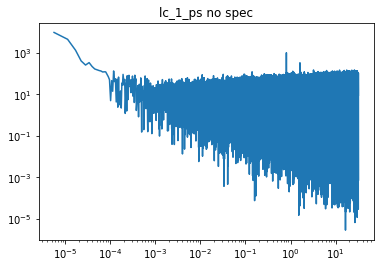

In [49]:
lc_1_ps=Powerspectrum.from_lightcurve(lc)
plt.figure()
plt.title('lc_1_ps no spec')
plt.plot(lc_1_ps.freq,lc_1_ps.power)
plt.xscale('log')
plt.yscale('log')


In [27]:
lc_1_ps_frac=Powerspectrum.from_lightcurve(lc,norm='frac')
lc_1_ps_abs=Powerspectrum.from_lightcurve(lc,norm='abs')


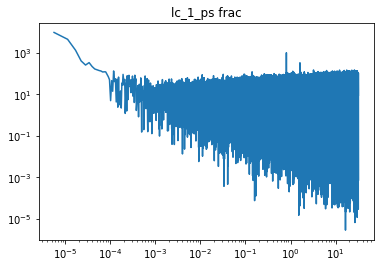

In [28]:
plt.figure()
plt.title('lc_1_ps frac')
plt.plot(lc_1_ps_frac.freq,lc_1_ps_frac.power)
plt.xscale('log')
plt.yscale('log')


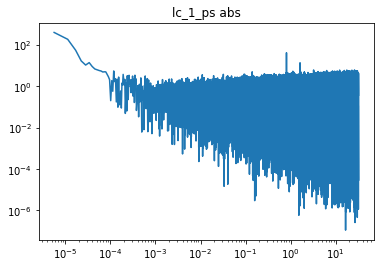

In [29]:

plt.figure()
plt.title('lc_1_ps abs')
plt.plot(lc_1_ps_abs.freq,lc_1_ps_abs.power)
plt.xscale('log')
plt.yscale('log')


In [103]:
const=-9.27442159e-13 

lc_sub=lc.counts-const
lc_sub=Lightcurve(lc.time,lc_sub)

/home/c2032014/.local/lib/python3.10/site-packages/stingray/utils.py:406: UserWarning: SIMON says: Bin sizes in input time array aren't equal throughout! This could cause problems with Fourier transforms. Please make the input time evenly sampled.Only use with LombScargleCrossspectrum, LombScarglePowerspectrum and QPO using GPResult
  warnings.warn("SIMON says: {0}".format(message), **kwargs)


In [77]:
lc_sub_ps=Powerspectrum.from_lightcurve(lc_sub)
lc_sub_frac=Powerspectrum.from_lightcurve(lc_sub,norm='frac')
lc_sub_abs=Powerspectrum.from_lightcurve(lc_sub,norm='abs')


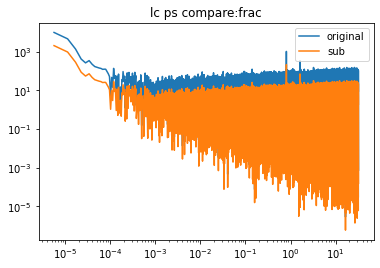

In [46]:

plt.figure()
plt.title('lc ps compare:frac')

plt.plot(lc_1_ps_frac.freq,lc_1_ps_frac.power,label='original')
plt.plot(lc_sub_frac.freq,lc_sub_frac.power,label='sub')
plt.xscale('log')
plt.yscale('log')
plt.legend()


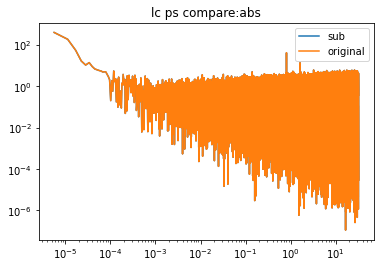

In [48]:
plt.figure()
plt.title('lc ps compare:abs')
plt.plot(lc_sub_abs.freq,lc_sub_abs.power,label='sub')

plt.plot(lc_1_ps_abs.freq,lc_1_ps_abs.power,label='original')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()



In [119]:
np.set_printoptions(threshold=1000) 

The fractional rms is bigger for the subtracted lightcurve than for the original lightcurve. 

In [50]:
print(lc_1_ps_abs.power[:100])
print(lc_sub_abs.power[:100])

[3.90664095e+02 1.82534889e+02 5.41318429e+01 1.64029999e+01
 1.04332980e+01 1.36643536e+01 8.83938766e+00 6.73558970e+00
 6.15823393e+00 5.66743647e+00 5.37482421e+00 4.81994325e+00
 4.92244654e+00 4.89444468e+00 3.65134867e+00 2.84562339e+00
 2.04254407e+00 1.99239533e-01 1.84918928e+00 5.65770654e-01
 5.41089153e+00 1.65590492e+00 2.26536729e+00 1.72437465e-01
 2.16916980e+00 9.64971714e-02 2.74130230e+00 1.26314122e-01
 1.83126605e-01 5.85617159e-01 8.76613035e-02 1.39720097e+00
 1.12997307e+00 3.69438358e+00 2.09302107e+00 1.11397847e+00
 2.12307141e+00 4.81907721e-02 2.46346596e-01 1.41389549e+00
 6.29690648e-02 3.16772539e+00 4.06489763e-01 2.24328302e-01
 1.25865389e+00 3.34584625e+00 1.25360088e+00 2.06343443e+00
 9.33511738e-01 1.01800336e+00 4.82985245e-01 1.99179176e+00
 1.58418513e+00 8.26956088e-01 3.06095735e+00 4.88975647e-01
 3.24130886e-01 2.13955365e+00 1.30240358e+00 1.62145016e-01
 1.75211398e-01 3.38129444e+00 1.10315833e+00 1.84936533e+00
 1.97279127e+00 2.238175

In [78]:
#NOW FOR ADD

lc_add=lc.counts+const
lc_add=Lightcurve(lc.time,lc_add)


In [104]:
lc_add_ps=Powerspectrum.from_lightcurve(lc_add)
lc_add_frac=Powerspectrum.from_lightcurve(lc_add,norm='frac')
lc_add_abs=Powerspectrum.from_lightcurve(lc_add,norm='abs')


KeyboardInterrupt: 

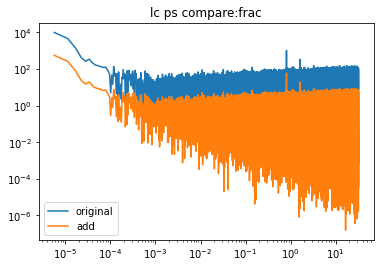

In [53]:
plt.figure()
plt.title('lc ps compare:frac')
plt.plot(lc_1_ps_frac.freq,lc_1_ps_frac.power,label='original')
plt.plot(lc_add_frac.freq,lc_add_frac.power,label='add')
plt.xscale('log')
plt.yscale('log')
plt.legend()


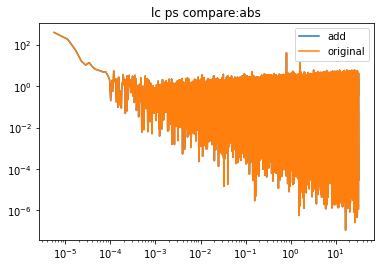

In [54]:
plt.figure()
plt.title('lc ps compare:abs')
plt.plot(lc_add_abs.freq,lc_add_abs.power,label='add')
plt.plot(lc_1_ps_abs.freq,lc_1_ps_abs.power,label='original')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()


In [55]:
print(lc_1_ps_abs.power[:100])
print(lc_add_abs.power[:100])

[3.90664095e+02 1.82534889e+02 5.41318429e+01 1.64029999e+01
 1.04332980e+01 1.36643536e+01 8.83938766e+00 6.73558970e+00
 6.15823393e+00 5.66743647e+00 5.37482421e+00 4.81994325e+00
 4.92244654e+00 4.89444468e+00 3.65134867e+00 2.84562339e+00
 2.04254407e+00 1.99239533e-01 1.84918928e+00 5.65770654e-01
 5.41089153e+00 1.65590492e+00 2.26536729e+00 1.72437465e-01
 2.16916980e+00 9.64971714e-02 2.74130230e+00 1.26314122e-01
 1.83126605e-01 5.85617159e-01 8.76613035e-02 1.39720097e+00
 1.12997307e+00 3.69438358e+00 2.09302107e+00 1.11397847e+00
 2.12307141e+00 4.81907721e-02 2.46346596e-01 1.41389549e+00
 6.29690648e-02 3.16772539e+00 4.06489763e-01 2.24328302e-01
 1.25865389e+00 3.34584625e+00 1.25360088e+00 2.06343443e+00
 9.33511738e-01 1.01800336e+00 4.82985245e-01 1.99179176e+00
 1.58418513e+00 8.26956088e-01 3.06095735e+00 4.88975647e-01
 3.24130886e-01 2.13955365e+00 1.30240358e+00 1.62145016e-01
 1.75211398e-01 3.38129444e+00 1.10315833e+00 1.84936533e+00
 1.97279127e+00 2.238175

In [112]:
# Now with cross spectra
from stingray import Crossspectrum
cs_frac_av=AveragedCrossspectrum.from_lightcurve(lc,lc_2_ref,segment_size=16,norm='frac')
cs_abs_av=AveragedCrossspectrum.from_lightcurve(lc,lc_2_ref,segment_size=16,norm='abs')

cs_frac=Crossspectrum.from_lightcurve(lc,lc_2_ref,norm='frac')
cs_abs=Crossspectrum.from_lightcurve(lc,lc_2_ref,norm='abs')

/home/c2032014/.local/lib/python3.10/site-packages/stingray/fourier.py:1125: UserWarning: n_ave is below 30. Please note that the error bars on the quantities derived from the cross spectrum are only reliable for a large number of averaged powers.
  warnings.warn(
/home/c2032014/.local/lib/python3.10/site-packages/stingray/fourier.py:1141: RuntimeWarning: invalid value encountered in sqrt
  dphi = np.sqrt(


In [115]:
cs_frac_sub=Crossspectrum.from_lightcurve(lc_sub,lc_2_ref,norm='frac')
cs_abs_sub=Crossspectrum.from_lightcurve(lc_sub,lc_2_ref,norm='abs')

cs_av_frac_sub=AveragedCrossspectrum.from_lightcurve(lc_sub,lc_2_ref,segment_size=16,norm='frac')
cs_av_abs_sub=AveragedCrossspectrum.from_lightcurve(lc_sub,lc_2_ref,segment_size=16,norm='abs')

/home/c2032014/.local/lib/python3.10/site-packages/stingray/fourier.py:1125: UserWarning: n_ave is below 30. Please note that the error bars on the quantities derived from the cross spectrum are only reliable for a large number of averaged powers.
  warnings.warn(
/home/c2032014/.local/lib/python3.10/site-packages/stingray/fourier.py:1141: RuntimeWarning: invalid value encountered in sqrt
  dphi = np.sqrt(
/home/c2032014/.local/lib/python3.10/site-packages/stingray/fourier.py:1139: RuntimeWarning: invalid value encountered in sqrt
  dRe = dIm = dG = np.sqrt(power_over_2n * (seg_power - frac))
/home/c2032014/.local/lib/python3.10/site-packages/stingray/crossspectrum.py:2912: UserWarning: Some error bars in the Averaged Crossspectrum are invalid.Defaulting to sqrt(2 / M) in Leahy norm, rescaled to the appropriate norm.
  warnings.warn(


In [82]:
cs_frac_add=Crossspectrum.from_lightcurve(lc_add,lc_2_ref,norm='frac')
cs_abs_add=Crossspectrum.from_lightcurve(lc_add,lc_2_ref,norm='abs')

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


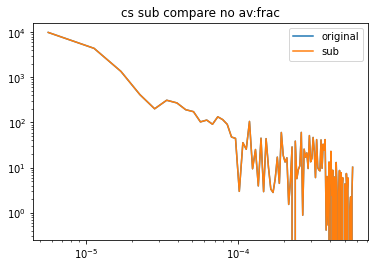

In [116]:
plt.figure()
plt.title('cs sub compare no av:frac')
plt.plot(cs_frac.freq[:100],cs_frac.power[:100],label='original')   
plt.plot(cs_frac_sub.freq[:100],cs_frac_sub.power[:100],label='sub')
#plt.plot(cs_frac_add.freq[:100],cs_frac_add.power[:100],label='add')
plt.xscale('log')
plt.yscale('log')

plt.legend()
plt.show()

In [120]:
print(cs_frac.power.real[:100])
print(cs_frac_sub.power.real[:100])


[ 9.86600342e+03  4.38722447e+03  1.35802213e+03  4.14663372e+02
  2.01176097e+02  3.10973068e+02  2.71545908e+02  1.92056731e+02
  1.73687271e+02  1.03156223e+02  1.13076735e+02  9.14163791e+01
  1.33630525e+02  1.15847836e+02  9.10036968e+01  4.76731311e+01
  4.44657437e+01  2.98497491e+00  3.57601787e+01  2.55612194e+01
  1.05610857e+02  9.44971783e+00  2.52115961e+01  3.94259828e+00
  4.49069441e+01  2.94027749e+00  4.39339044e+01  1.00851560e+01
  3.34393979e+00  2.82341624e+00  5.72385297e+00  1.70963153e+01
  4.48645415e+00  6.00841338e+01  1.85211570e+01  1.33378497e+01
  1.65170915e+01  1.53258018e+00  5.02297066e+00  2.87311097e+01
 -7.45326282e-01  3.86310854e+01  5.70779585e+00  9.14332069e+00
  1.09755089e+01  6.03299174e+01  8.86035645e-01  2.56760429e+01
  1.69667600e+01  2.12137635e+01  9.57710175e+00  5.13304880e+01
  1.34750253e+01  1.60635914e+01  4.66246264e+01  2.32074921e+01
  6.02314886e+00  4.18016355e+01  1.00494039e+01  8.90872660e+00
  8.48361801e+00  4.11105

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


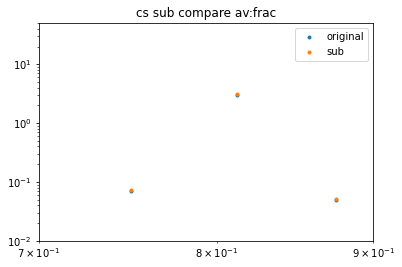

In [140]:
plt.figure()
plt.title('cs sub compare av:frac')
plt.plot(cs_frac_av.freq[:100],cs_frac_av.power[:100],'.',label='original')
plt.plot(cs_av_frac_sub.freq[:100],cs_av_frac_sub.power[:100],'.',label='sub')
plt.xscale('log')
plt.yscale('log')
plt.xlim(0.7,0.9)
plt.ylim(10e-3,5e1)
plt.legend()
plt.show()


In [122]:
print(cs_frac_av.power.real[:100])
print(cs_av_frac_sub.power.real[:100])

[-8.30815674e-03  1.21338602e-02  1.53920349e-02 -3.68056488e-02
  1.36396817e-02 -5.25671525e-03  2.83274763e-02 -2.43234002e-03
  9.24616524e-03  5.12242630e-03 -1.37054100e-02  6.98720081e-02
  3.04685850e+00  4.88513171e-02 -1.48397424e-02  2.40992485e-02
  2.12819117e-02  4.25363568e-03  3.79649688e-02  1.31706138e-02
 -1.49075619e-02  1.52547363e-02 -3.82766963e-02 -1.50573504e-02
  9.23777348e-02  8.80346765e-01  5.16531867e-02  2.54502749e-02
 -1.28243221e-03  2.27405444e-02  5.16339149e-02  1.02230512e-02
 -2.46193394e-02  9.12366152e-04 -2.22563715e-02 -3.68684964e-02
 -6.00151548e-02  3.01873916e-02  1.54072587e-01  5.90142834e-02
  4.47748041e-02  1.10887850e-02 -1.42322739e-02 -1.74752273e-02
  2.96423277e-02  2.97535290e-02  7.56158378e-03 -1.02494183e-02
  2.30495840e-02  2.14505124e-02  6.29625521e-02  3.11729637e-01
  2.24983213e-02 -1.64209870e-02 -3.89305559e-02 -1.89377380e-02
 -1.27870221e-02  7.03530110e-03 -3.77583735e-02  1.88402817e-02
 -9.72284460e-04 -4.71448

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


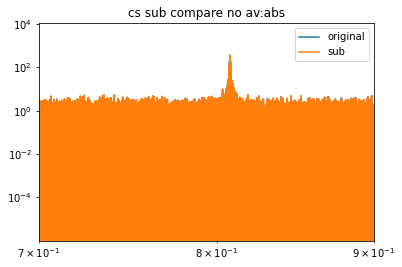

In [132]:
plt.figure()
plt.title('cs sub compare no av:abs')
plt.plot(cs_abs.freq[:1000000],cs_abs.power[:1000000],label='original')
plt.plot(cs_abs_sub.freq[:1000000],cs_abs_sub.power[:1000000],label='sub')#
#plt.plot(cs_abs_add.freq[:100],cs_abs_add.power[:100],label='add')
plt.xscale('log')

plt.yscale('log')
plt.xlim(0.7,0.9)
plt.legend()
plt.show()


In [134]:
print(cs_abs.power.real[:100])
print(cs_abs_sub.power.real[:100])

[ 3.82599206e+03  1.70134605e+03  5.26634915e+02  1.60804604e+02
  7.80151919e+01  1.20593967e+02  1.05304290e+02  7.44787423e+01
  6.73551479e+01  4.00035225e+01  4.38506529e+01  3.54508635e+01
  5.18213208e+01  4.49252735e+01  3.52908271e+01  1.84874273e+01
  1.72436168e+01  1.15755994e+00  1.38676376e+01  9.91252673e+00
  4.09554185e+01  3.66455837e+00  9.77694437e+00  1.52892200e+00
  1.74147123e+01  1.14022648e+00  1.70373719e+01  3.91097845e+00
  1.29676492e+00  1.09490821e+00  2.21968461e+00  6.62987471e+00
  1.73982688e+00  2.33003587e+01  7.18242195e+00  5.17235854e+00
  6.40525432e+00  5.94327750e-01  1.94788558e+00  1.11417960e+01
 -2.89034203e-01  1.49809624e+01  2.21345773e+00  3.54573892e+00
  4.25625332e+00  2.33956725e+01  3.43600666e-01  9.95705474e+00
  6.57963375e+00  8.22660273e+00  3.71395728e+00  1.99057340e+01
  5.22555463e+00  6.22938899e+00  1.80808218e+01  8.99976177e+00
  2.33575022e+00  1.62104876e+01  3.89711393e+00  3.45476438e+00
  3.28990917e+00  1.59424

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


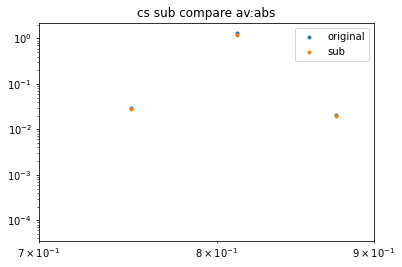

In [142]:
plt.figure()
plt.title('cs sub compare av:abs')
plt.plot(cs_abs_av.freq[:100000],cs_abs_av.power[:100000],'.',label='original')
plt.plot(cs_av_abs_sub.freq[:1000000],cs_av_abs_sub.power[:100000],'.',label='sub')
plt.xscale('log')
plt.yscale('log')
plt.xlim(0.7,0.9)
plt.legend()
plt.show()

In [135]:
print(cs_abs_av.power.real[:100])
print(cs_av_abs_sub.power.real[:100])

[-3.58279572e-03  5.23258572e-03  6.63763558e-03 -1.58720069e-02
  5.88195367e-03 -2.26689715e-03  1.22158938e-02 -1.04891827e-03
  3.98730094e-03  2.20898661e-03 -5.91029823e-03  3.01314887e-02
  1.31392220e+00  2.10665609e-02 -6.39946588e-03  1.03925199e-02
  9.17757626e-03  1.83433079e-03  1.63719501e-02  5.67967361e-03
 -6.42871223e-03  6.57842714e-03 -1.65063790e-02 -6.49330677e-03
  3.98368210e-02  3.79639277e-01  2.22748344e-02  1.09751343e-02
 -5.53033935e-04  9.80659459e-03  2.22665237e-02  4.40857163e-03
 -1.06168030e-02  3.93447264e-04 -9.59780069e-03 -1.58991092e-02
 -2.58808357e-02  1.30179606e-02  6.64420067e-02  2.54492216e-02
  1.93086122e-02  4.78190924e-03 -6.13750215e-03 -7.53598801e-03
  1.27829082e-02  1.28308624e-02  3.26084483e-03 -4.41994214e-03
  9.93986435e-03  9.25028333e-03  2.71518664e-02  1.34429771e-01
  9.70213873e-03 -7.08135915e-03 -1.67883483e-02 -8.16667870e-03
 -5.51425419e-03  3.03389156e-03 -1.62828583e-02  8.12465179e-03
 -4.19286336e-04 -2.03306

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


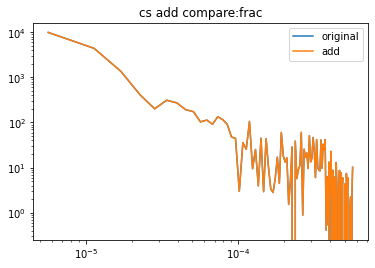

In [96]:
plt.figure()
plt.title('cs add compare:frac')
plt.plot(cs_frac.freq[:100],cs_frac.power[:100],label='original')
plt.plot(cs_frac_add.freq[:100],cs_frac_add.power[:100],label='add')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


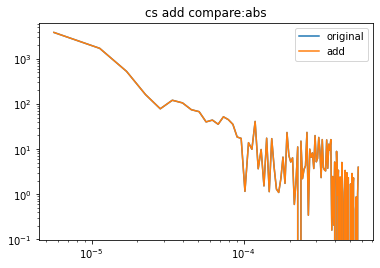

In [97]:
plt.figure()
plt.title('cs add compare:abs')
plt.plot(cs_abs.freq[:100],cs_abs.power[:100],label='original')
plt.plot(cs_abs_add.freq[:100],cs_abs_add.power[:100],label='add')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()


In [95]:
print(cs_abs.power.real[:100])
print(cs_abs_sub.power.real[:100])
print(cs_abs_add.power.real[:100])

[ 3.82599206e+03  1.70134605e+03  5.26634915e+02  1.60804604e+02
  7.80151919e+01  1.20593967e+02  1.05304290e+02  7.44787423e+01
  6.73551479e+01  4.00035225e+01  4.38506529e+01  3.54508635e+01
  5.18213208e+01  4.49252735e+01  3.52908271e+01  1.84874273e+01
  1.72436168e+01  1.15755994e+00  1.38676376e+01  9.91252673e+00
  4.09554185e+01  3.66455837e+00  9.77694437e+00  1.52892200e+00
  1.74147123e+01  1.14022648e+00  1.70373719e+01  3.91097845e+00
  1.29676492e+00  1.09490821e+00  2.21968461e+00  6.62987471e+00
  1.73982688e+00  2.33003587e+01  7.18242195e+00  5.17235854e+00
  6.40525432e+00  5.94327750e-01  1.94788558e+00  1.11417960e+01
 -2.89034203e-01  1.49809624e+01  2.21345773e+00  3.54573892e+00
  4.25625332e+00  2.33956725e+01  3.43600666e-01  9.95705474e+00
  6.57963375e+00  8.22660273e+00  3.71395728e+00  1.99057340e+01
  5.22555463e+00  6.22938899e+00  1.80808218e+01  8.99976177e+00
  2.33575022e+00  1.62104876e+01  3.89711393e+00  3.45476438e+00
  3.28990917e+00  1.59424

In [98]:
print(cs_frac.power.real[:100])
#print(cs_frac_sub.power.real[:100])
print(cs_frac_add.power.real[:100])

[ 9.86600342e+03  4.38722447e+03  1.35802213e+03  4.14663372e+02
  2.01176097e+02  3.10973068e+02  2.71545908e+02  1.92056731e+02
  1.73687271e+02  1.03156223e+02  1.13076735e+02  9.14163791e+01
  1.33630525e+02  1.15847836e+02  9.10036968e+01  4.76731311e+01
  4.44657437e+01  2.98497491e+00  3.57601787e+01  2.55612194e+01
  1.05610857e+02  9.44971783e+00  2.52115961e+01  3.94259828e+00
  4.49069441e+01  2.94027749e+00  4.39339044e+01  1.00851560e+01
  3.34393979e+00  2.82341624e+00  5.72385297e+00  1.70963153e+01
  4.48645415e+00  6.00841338e+01  1.85211570e+01  1.33378497e+01
  1.65170915e+01  1.53258018e+00  5.02297066e+00  2.87311097e+01
 -7.45326282e-01  3.86310854e+01  5.70779585e+00  9.14332069e+00
  1.09755089e+01  6.03299174e+01  8.86035645e-01  2.56760429e+01
  1.69667600e+01  2.12137635e+01  9.57710175e+00  5.13304880e+01
  1.34750253e+01  1.60635914e+01  4.66246264e+01  2.32074921e+01
  6.02314886e+00  4.18016355e+01  1.00494039e+01  8.90872660e+00
  8.48361801e+00  4.11105

In [65]:
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 1000000  # Increase this number if necessary


In [146]:
import numpy as np
from stingray import Lightcurve, Crossspectrum

def compute_average_cross_spectrum(time1, counts1, time2, counts2, Tseg, dt):
    """
    Computes the cross-spectrum for given light curves, segments them, and averages the results.
    
    Parameters:
    time1, counts1: array-like
        Time and count data for the first light curve.
    time2, counts2: array-like
        Time and count data for the second light curve.
    Tseg: float
        Segment size for averaging.
    dt: float
        Time resolution.
    
    Returns:
    freqs: array
        The frequency array of the cross-spectrum.
    avg_cs: array
        The averaged cross-spectrum.
    """
    tmin, tmax = min(time1), max(time1)
    num_segments = int((tmax - tmin) / Tseg)
    
    cross_spectra = []
    
    for i in range(num_segments):
        t_start = tmin + i * Tseg
        t_end = t_start + Tseg
        
        mask1 = (time1 >= t_start) & (time1 < t_end)
        mask2 = (time2 >= t_start) & (time2 < t_end)
        
        if np.sum(mask1) == 0 or np.sum(mask2) == 0:
            continue
        
        lc1 = Lightcurve(time1[mask1], counts1[mask1], dt=dt)
        lc2 = Lightcurve(time2[mask2], counts2[mask2], dt=dt)
        
        cs = Crossspectrum(lc1, lc2, norm="frac")
        cross_spectra.append(cs)
    
    if not cross_spectra:
        raise ValueError("No valid segments found for cross-spectrum calculation.")
    
    avg_cs = np.mean(cross_spectra, axis=0)
    
    return cs.freq, avg_cs

# Example usage
if __name__ == "__main__":
    time = np.arange(0, 1000, 1)  # 1000s light curve with 1s resolution
    counts1 = np.random.poisson(100, size=len(time))
    counts2 = np.random.poisson(100, size=len(time))
    
    freqs, avg_cs = compute_average_cross_spectrum(time, counts1, time, counts2, Tseg=100, dt=1)
    
    print("Frequencies:", freqs)
    print("Averaged Cross-Spectrum:", avg_cs)

KeyboardInterrupt: 